In [6]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import math
from matplotlib.lines import Line2D
import Debug

In [7]:
def generate_sphere_points(noise =0.0):
    x0 = random.uniform(0, 500)
    y0 = random.uniform(0, 500)
    z0 = random.uniform(0, 500)

    r = random.uniform(20, 100)
    n = random.randint(4, 20)

    points = []
    for _ in range(n):
        theta = random.uniform(0, 2 * math.pi)     
        phi = math.acos(random.uniform(0, 1))       

        x = x0 + r * math.sin(phi) * math.cos(theta) + np.random.normal(0, noise)
        y = y0 + r * math.sin(phi) * math.sin(theta) + np.random.normal(0, noise)
        z = z0 + r * math.cos(phi) + np.random.normal(0, noise)

        points.append((x, y, z))

    return points, r, x0, y0, z0



In [8]:

points, r, x0, y0, z0 = generate_sphere_points(np.random.uniform(0, 5))

print(f"Center Point: ({x0:.2f}, {y0:.2f}, {z0:.2f})")
print(f"Radius: {r:.2f}")
print(f"Number of Points: {len(points)}")
print("Points on the Sphere Surface:")
for point in points:
    print(f"({point[0]:.2f}, {point[1]:.2f}, {point[2]:.2f})")


Center Point: (492.13, 25.98, 336.50)
Radius: 39.62
Number of Points: 12
Points on the Sphere Surface:
(497.38, -16.94, 336.92)
(475.60, 63.66, 336.35)
(478.27, 30.61, 372.69)
(465.68, -0.42, 348.79)
(502.42, 48.28, 367.62)
(508.16, 47.32, 365.79)
(521.64, 31.95, 359.38)
(491.56, -12.20, 336.94)
(501.37, 53.98, 362.49)
(504.44, -2.02, 359.05)
(506.96, -7.58, 341.97)
(524.04, 20.98, 363.09)


In [9]:
def total_pos_error(center, x0, y0, z0):
    ''' Returns the Euclidean distance between the estimated center and the true center '''
    return np.linalg.norm(center - np.array([x0, y0, z0]))

def total_radius_error(radius, r):
    ''' Returns the absolute difference between the estimated radius and the true radius '''
    return abs(radius - r)

### Visualize the data above

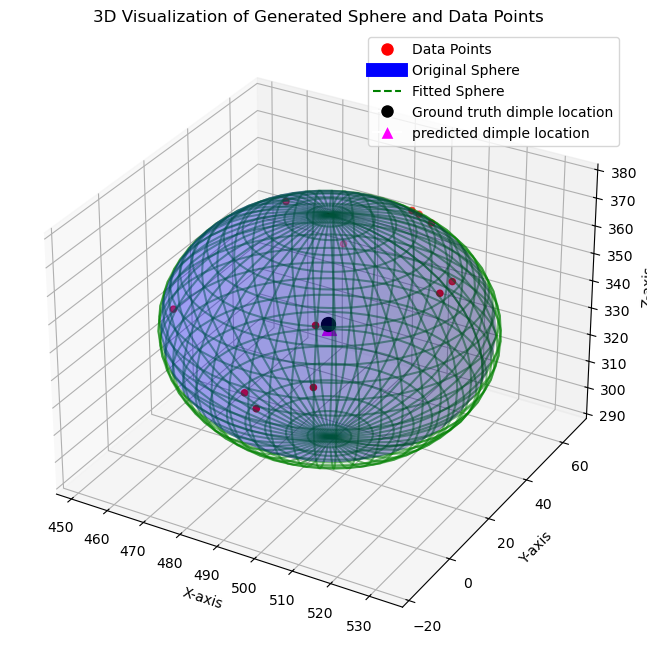

True Center: (492.1290, 25.9764, 336.4965)
True Radius: 39.6194

Estimated Center: (492.1006, 26.7423, 334.6528)
Estimated Radius: 40.4873
Sum of Squared Residuals: 3.1172e+01

Total Position Error: 1.9966
Total Radius Error: 0.8678


In [10]:

center, radius, residuals = Debug.fit_sphere(points)

x_points = [p[0] for p in points]
y_points = [p[1] for p in points]
z_points = [p[2] for p in points]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_points, y_points, z_points, color='r', label='Measurements')
ax.scatter(x0, y0, z0, color='black', marker='o', s=100, label='Ground truth dimple location')
ax.scatter(center[0], center[1], center[2], color='magenta', marker='^', s=100, label='predicted dimple location')


u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x_sphere = x0 + r * np.cos(u) * np.sin(v)
y_sphere = y0 + r * np.sin(u) * np.sin(v)
z_sphere = z0 + r * np.cos(v)
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.2, label='Ground Truth')

x_fit_sphere = center[0] + radius * np.cos(u) * np.sin(v)
y_fit_sphere = center[1] + radius * np.sin(u) * np.sin(v)
z_fit_sphere = center[2] + radius * np.cos(v)
ax.plot_wireframe(x_fit_sphere, y_fit_sphere, z_fit_sphere, color='g', alpha=0.5, label='Fitted Sphere')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Visualization of Generated Sphere and Data Points')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data Points',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], linestyle='-', markerfacecolor='b', color='b', label='Original Sphere', linewidth=10),
                   Line2D([0], [0], linestyle='--', color='g', label='Fitted Sphere'),
                   Line2D([0], [0], marker='o', color='w', label='Ground truth dimple location',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='predicted dimple location',
                          markerfacecolor='magenta', markersize=10)]

ax.legend(handles=legend_elements)


plt.show()

print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
print(f"True Radius: {r:.4f}")
print(f"\nEstimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
print(f"Estimated Radius: {radius:.4f}")
print(f"Sum of Squared Residuals: {residuals:.4e}\n")

print(f"Total Position Error: {total_pos_error(center, x0, y0, z0):.4f}")
print(f"Total Radius Error: {total_radius_error(radius, r):.4f}")

In [11]:
i = 0
avg_p_error = 0
avg_r_error = 0
while(i < 1000):
    i += 1
    points, r, x0, y0, z0 = generate_sphere_points(random.uniform(0, 5))
    center, radius, residual_sum = Debug.fit_sphere(points)

    p_error = total_pos_error(center, x0, y0, z0)
    r_error = total_radius_error(radius, r)

    avg_p_error += p_error
    avg_r_error += r_error

    print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
    print(f"True Radius: {r:.4f}")
    print(f"Estimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
    print(f"Estimated Radius: {radius:.4f}")

    print("Trial ", i, ":")
    print(f"Total Position Error: {p_error:.4f}")
    print(f"Total Radius Error: {r_error:.4f}\n")
    
print(f"Position Error: {avg_p_error:.4f}")
print(f"Radius Error: {avg_r_error:.4f}")
print(i)


print(f"Average Position Error: {avg_p_error/i:.4f}")
print(f"Average Radius Error: {avg_r_error/i:.4f}\n")


True Center: (222.0042, 401.9357, 52.2139)
True Radius: 78.2912
Estimated Center: (222.0119, 402.0353, 52.3407)
Estimated Radius: 78.2043
Trial  1 :
Total Position Error: 0.1614
Total Radius Error: 0.0869

True Center: (191.0105, 371.0382, 360.3405)
True Radius: 81.2790
Estimated Center: (191.1577, 371.1268, 360.3873)
Estimated Radius: 81.2510
Trial  2 :
Total Position Error: 0.1780
Total Radius Error: 0.0280

True Center: (372.7399, 370.8599, 23.9268)
True Radius: 57.2647
Estimated Center: (372.1051, 368.0238, 23.6502)
Estimated Radius: 58.5865
Trial  3 :
Total Position Error: 2.9194
Total Radius Error: 1.3218

True Center: (135.9741, 288.1229, 166.9019)
True Radius: 40.1405
Estimated Center: (134.6703, 287.9196, 166.4664)
Estimated Radius: 40.2524
Trial  4 :
Total Position Error: 1.3896
Total Radius Error: 0.1118

True Center: (405.0208, 416.1951, 108.0980)
True Radius: 25.9831
Estimated Center: (403.9749, 418.5286, 104.8844)
Estimated Radius: 28.8725
Trial  5 :
Total Position Error: